## Campaign for selling personal loans
_______________________________________________________________________________________________________________________________

    Identifying customers with high probability of taking a loan using Logestic Regression 
_______________________________________________________________________________________________________________________________ 


*****
#### 1.a Import requied libraries
*****

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


****
#### 1.b Read dataset
****

In [4]:
bank_data_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bank_data_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


****
#### 2 . Check Shape and Info of the data set
****

In [5]:
print("Shape of the dataset = "+ str(bank_data_df.shape))

Shape of the dataset = (5000, 14)


In [6]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<font color='green'> 
****    
#### Inference
As the above results show that there are non NAN or nulls in the data.
All the fields except for CCAvg are int64 which is intutive as its a division output
****
</font>

****
#### 3. Use Desribe to analyse the data
****

In [7]:
bank_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
bank_data_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<font color='green'> 
****
#### Inference
1. All the 14 fileds are present in the summary hence the datatypes are represented correctly(no NAN values)
2. **ID** column has very high standard deviation. As this is just a sequence number, this column would not influence 
    the outcome of taking a loan. Hence this field can be dropped during analysis
3. **Age** spread of age is relatively less compared to others. The Quartile 2 and 3 values indicate a near gaussian distribution.
4. **Experience** has negitive values. To compensate for this the negitive values should be replaced by the median or we can use absolute values.
5. **Income** has a very high standard deviation and the values of 25 percentile and 50 percentile show that the data is 
    right skewed and has extreme outlier on the right side. This is the general trend with income as the minimin pragmatic    
    income is zero and max income has no bounds. We will use the data as is.
6. **ZIPCODE** The spread is high and the values are very large .Stddev is realtively low when compared to the spread and 
    hence indicating all the values are clutered in a small range. This indicates that the influence on output is very less.We will be performing further analysis to confirm the same.
7. **Family,Education,Securities Account,CD Account,Online,CrediCard** are catogorical variables
8. **Mortgage** has outliers and is extremely right skewed.
****
</font>

****
#### 4. Study data Distribution of each column
****

Let's examine the boxplot of each column to check the data distribution and presence of outliers

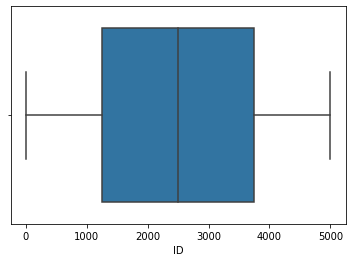

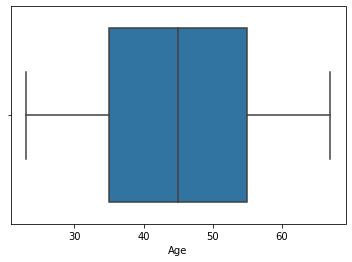

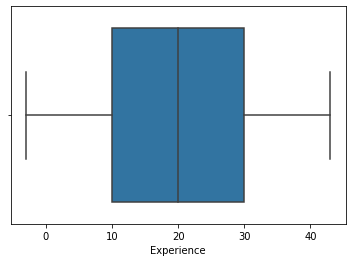

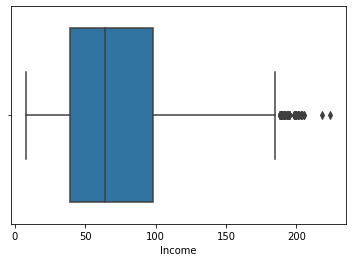

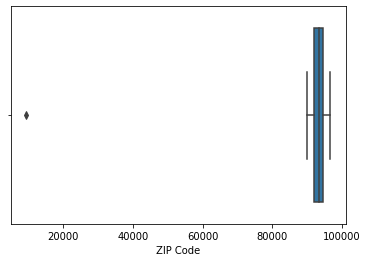

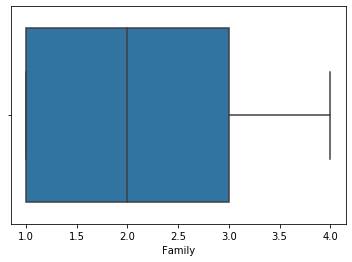

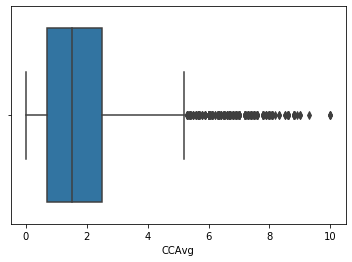

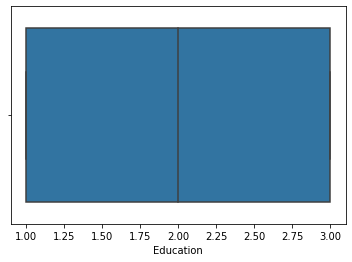

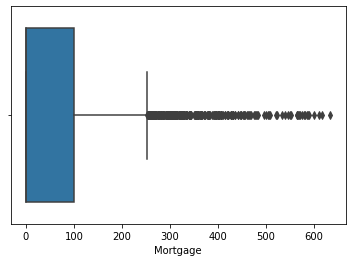

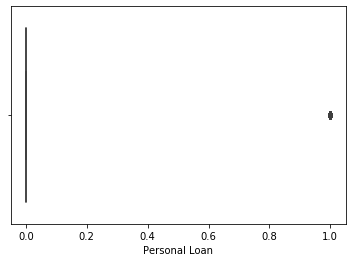

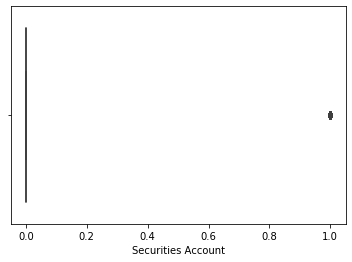

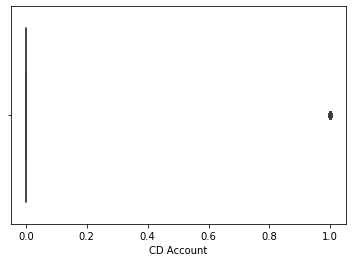

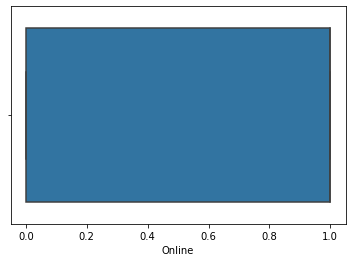

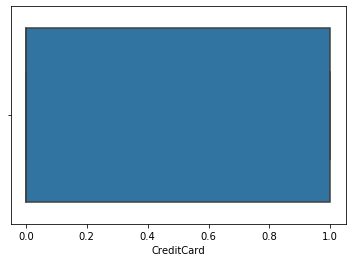

In [9]:
for column in bank_data_df.columns:
    sns.boxplot(bank_data_df.loc[:,column])
    plt.show()

<font color='green'> 
****
#### Inference
1. Columns **ID,Age,Experience** have a normal distribution like data distribution with no outlers.
2. **Income** column id right skewed which is not ideal and the spread is relatively on the higher side for logestic regression.As metioned earlier the negitive values should be transformed.
3. **ZipCode** seems to be left skewed ,the spread is very high and in general are large numbers.
4. **Family** is acting like a catogorical vaiable with 4 distinct values
5. **CCAvg** is extremely right skewed not ideal for logisticc regression
6. **Mortgage** The mortigae field has outliers and is right skewed.
7. **Rest** of the fields are catagorical in nature
****
</font>

Let us plot and analyse the distribution of each column


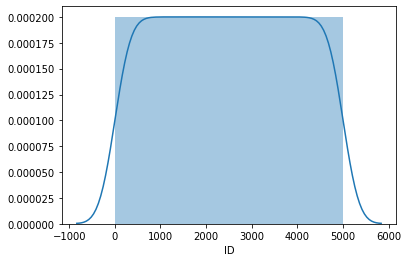

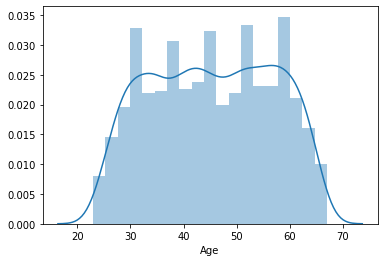

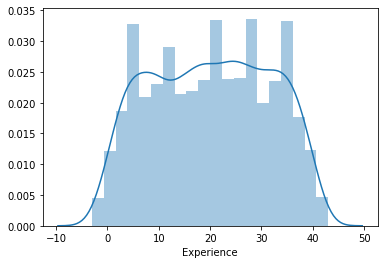

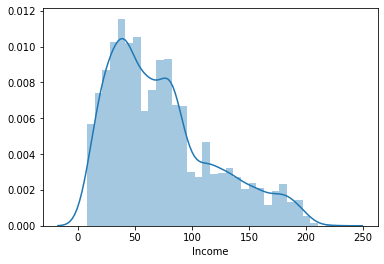

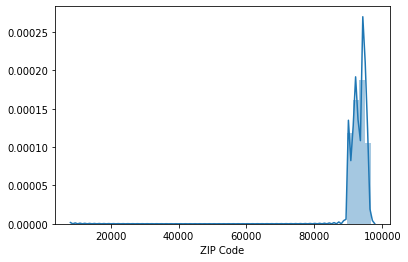

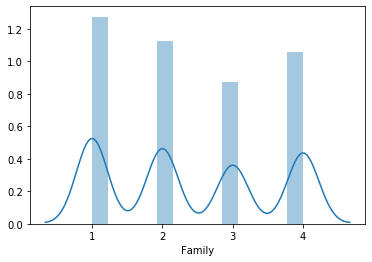

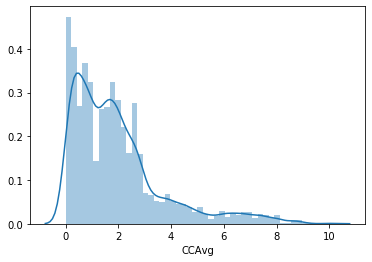

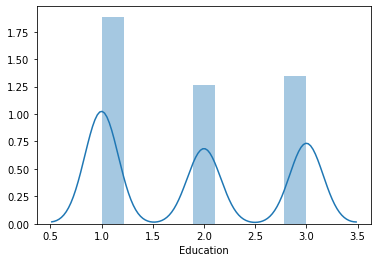

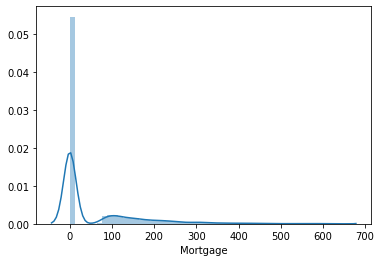

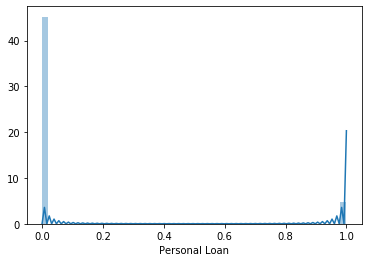

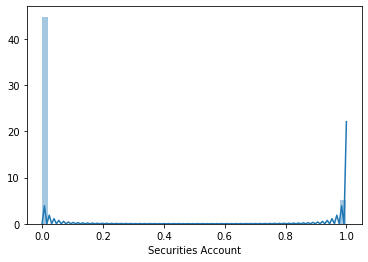

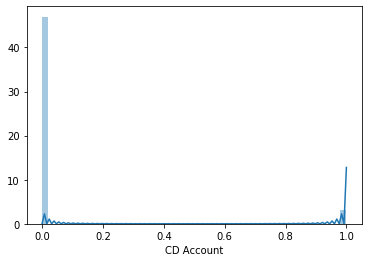

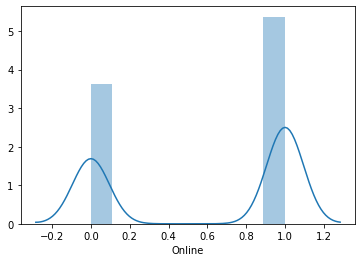

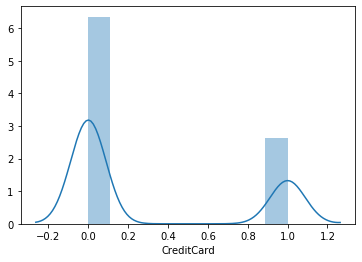

In [10]:
for column in bank_data_df.columns:
    sns.distplot(bank_data_df.loc[:,column])
    plt.show()

<font color='green'> 
****
#### Inference
These plots confirm few of our conclusions earlier
1. ID column has a uniform occurence probability for all values hence would not influence the output
2. Zip code has extreme outiers and most of the data is concentrated in a close clusters so will not influence the predection.
3. Near gaussian data w.r.t Age and experiece. **The data of both columns are fine seperately but the plot indicates high co-relation .Furher analysis to confirm the same.**
4. Income is right skewed 
    
****
</font>

****
#### 5. Get Target Column Distribution
****

In [11]:
bank_data_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

<font color='green'> 
****
#### Inference
The number of records with **"1"** in the given data is very less.
    This would make the model biased.The model might not be aaccurate in predecting the Personal Loan to be "1".
    
****
</font>

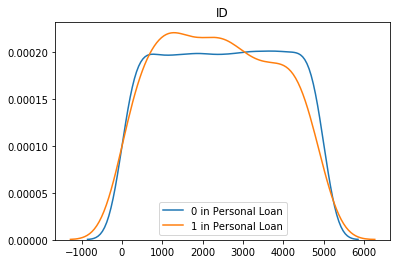

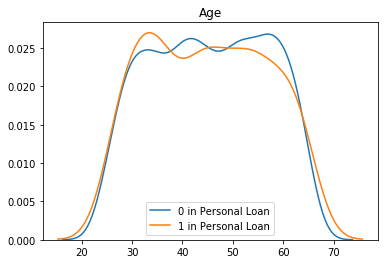

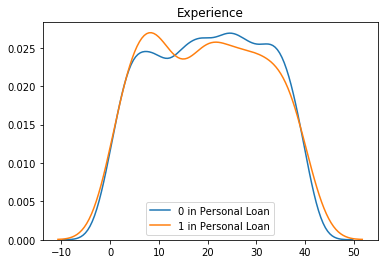

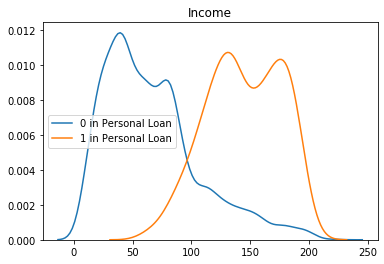

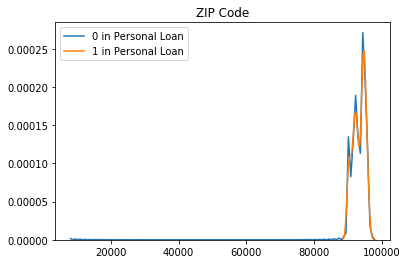

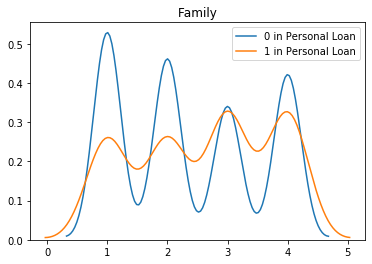

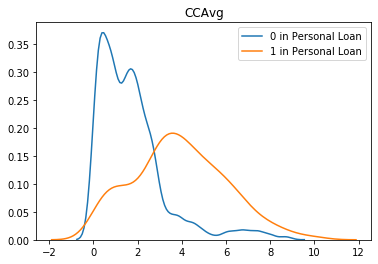

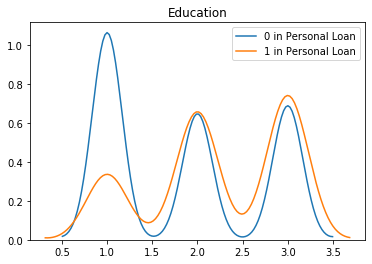

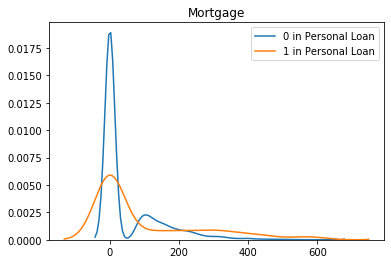

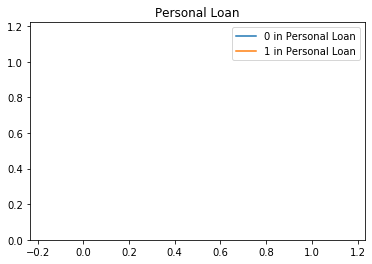

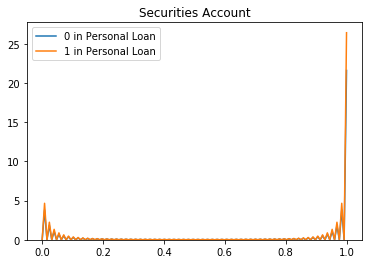

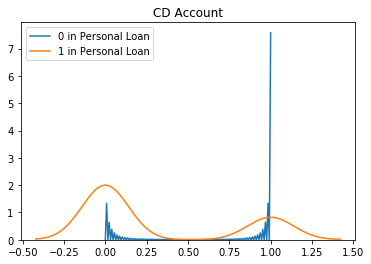

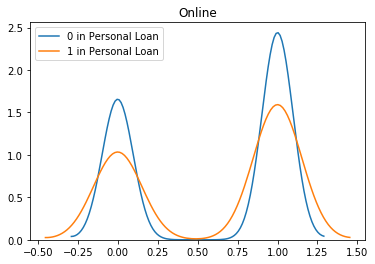

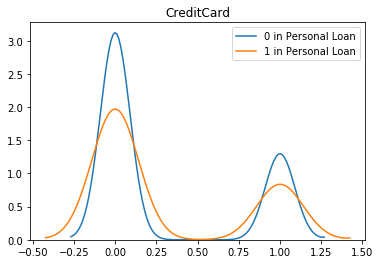

In [12]:
for column in bank_data_df.columns:
    sns.kdeplot(bank_data_df.loc[bank_data_df['Personal Loan']==0,column],label="0 in Personal Loan")
    sns.kdeplot(bank_data_df.loc[bank_data_df['Personal Loan']==1,column],label="1 in Personal Loan")
    plt.title(column)
    plt.show()

<font color='green'> 
****
#### Inference
1. **ID**  doesnt influence the classification.(The overlap in distribution is very high)
2. Similiar situation with **Age,Experience,ZipCode,Mortegage**
3. **Income** has very less overlap relatively and can be a very good classifier feature.
****
</font>

****
#### 6. Perform Bivariant Analysis
****

Lets plot pairplot and analyse the results

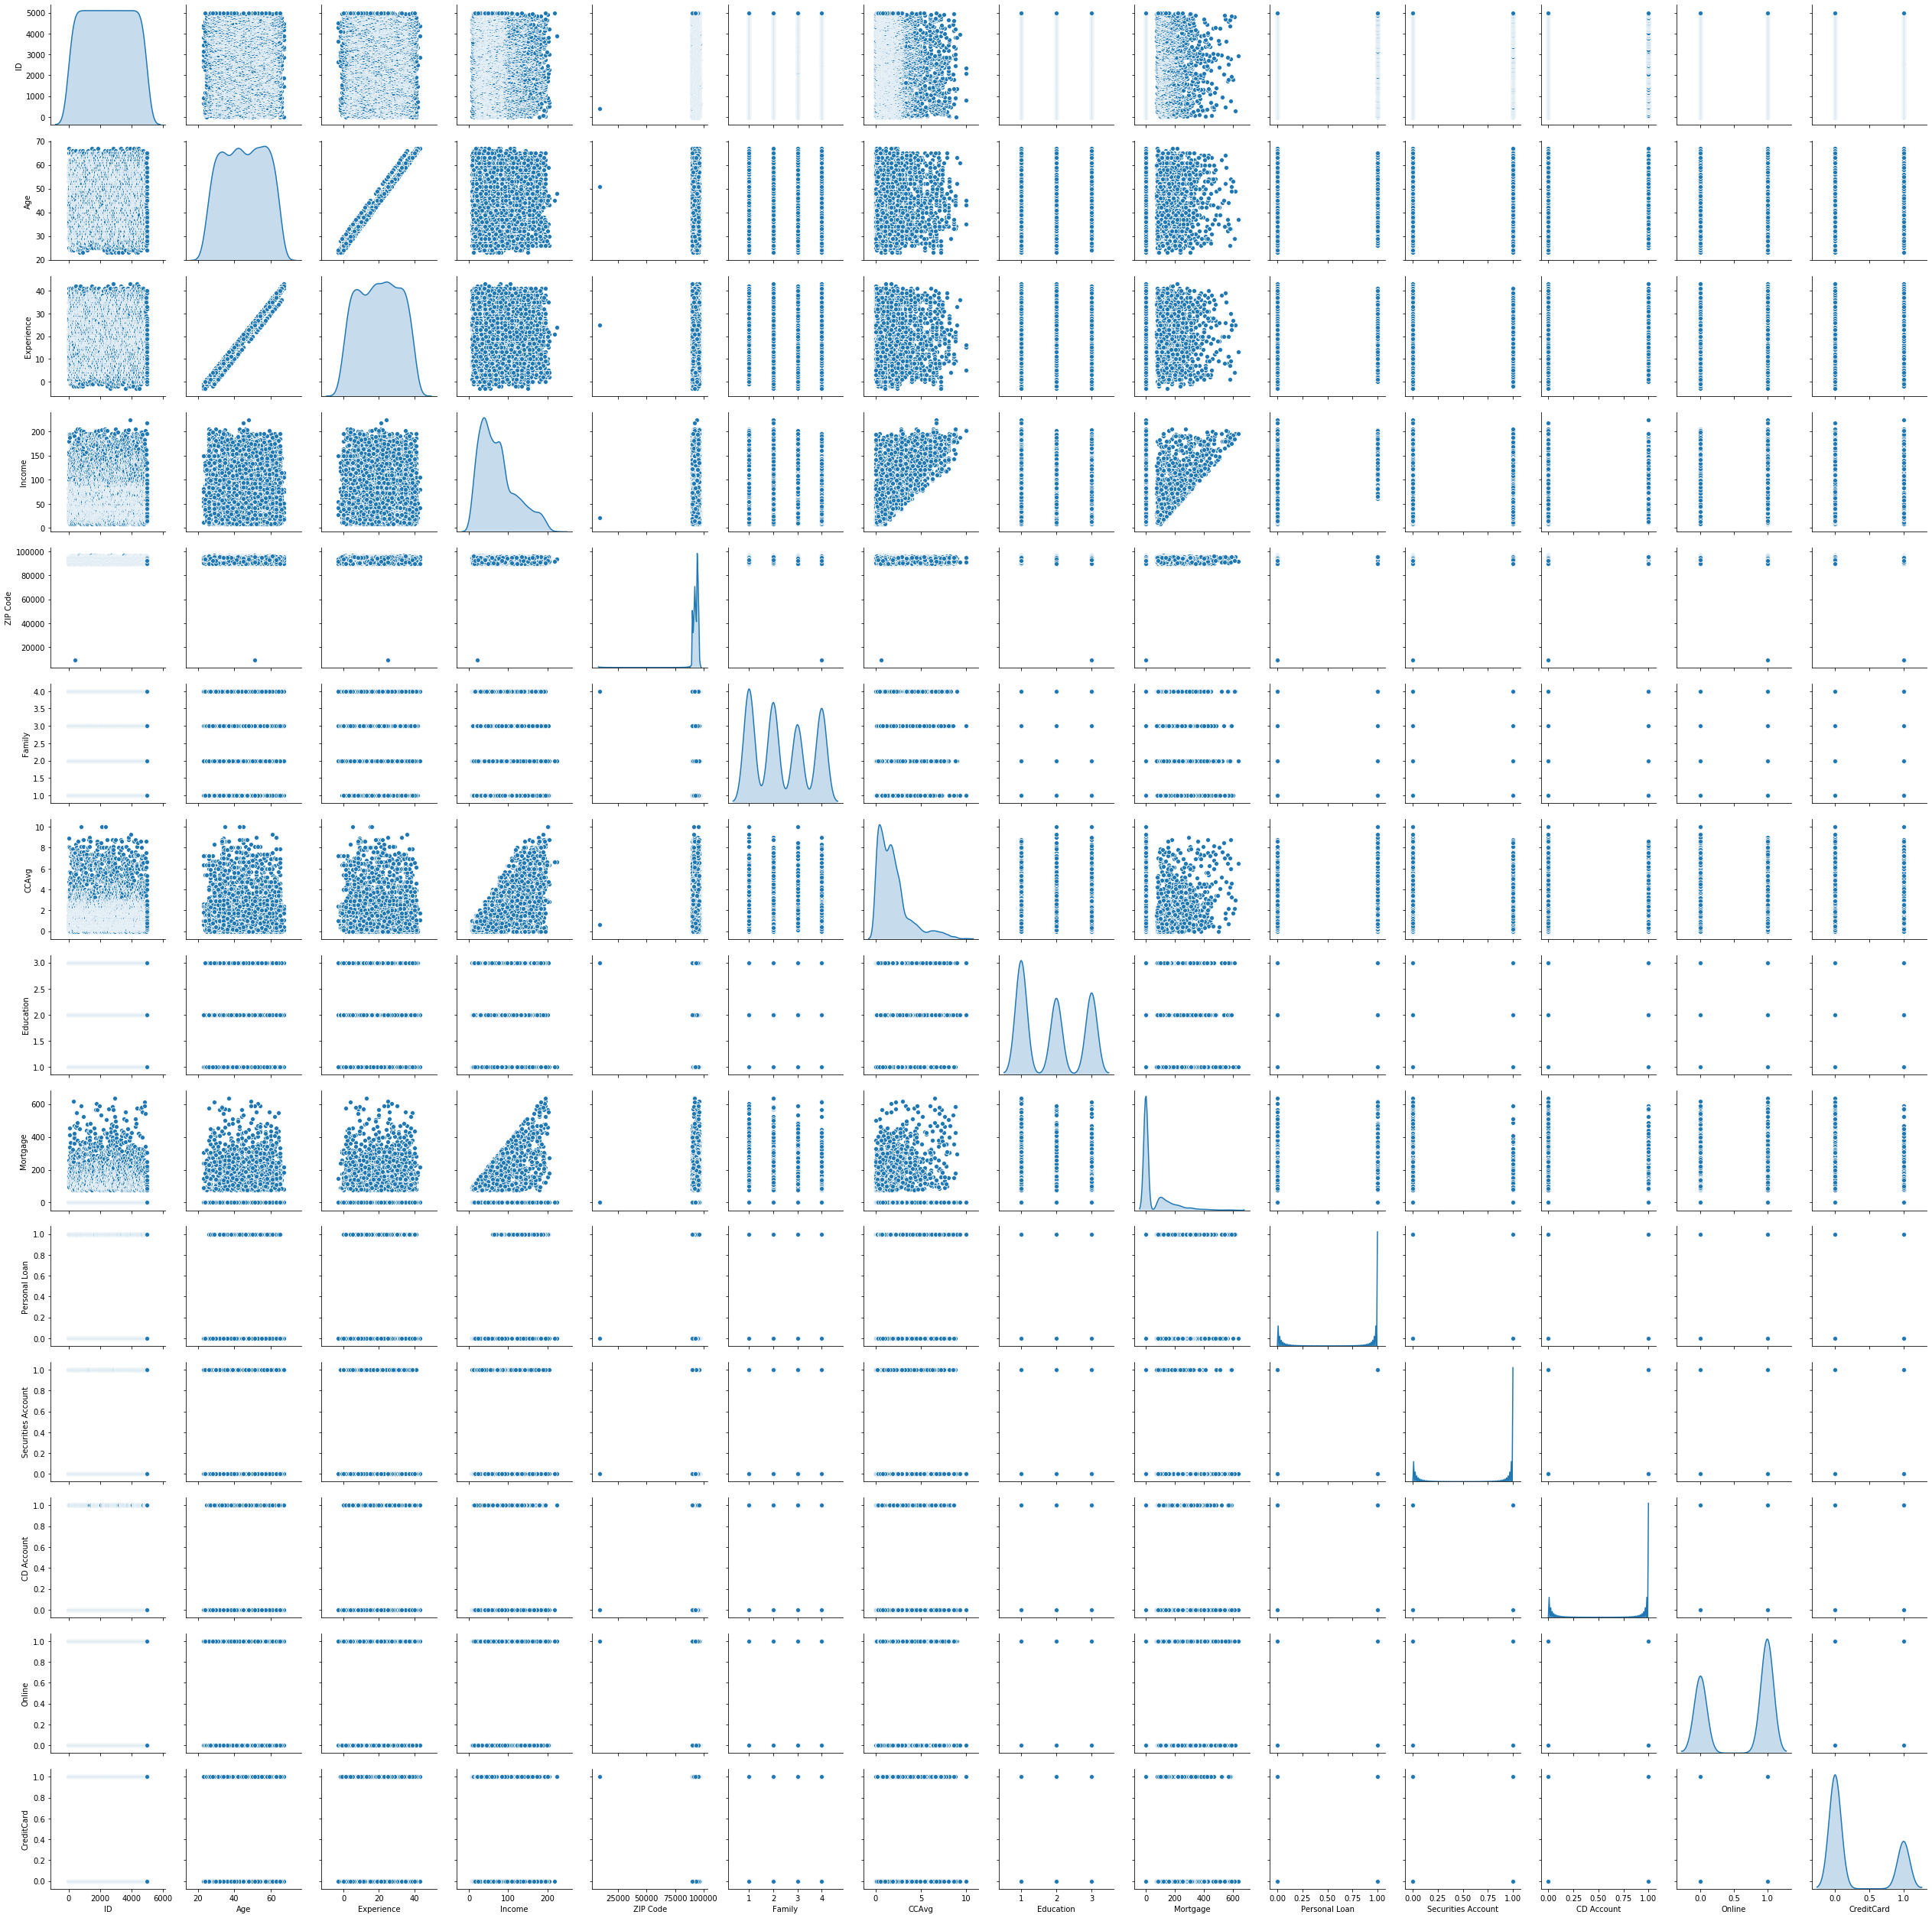

In [13]:
sns.pairplot(bank_data_df,diag_kind='kde')

<font color='green'> 
****
#### Inference
1. **Age,Experience** are linearly co-related.Theoritically having one of them is good enough.
2. All the non catogorical diagonal elements are near Gaussian which is in aggrement with out earlier conclusion
3. Lower income range are trending towards not taking a loans.
****
</font>

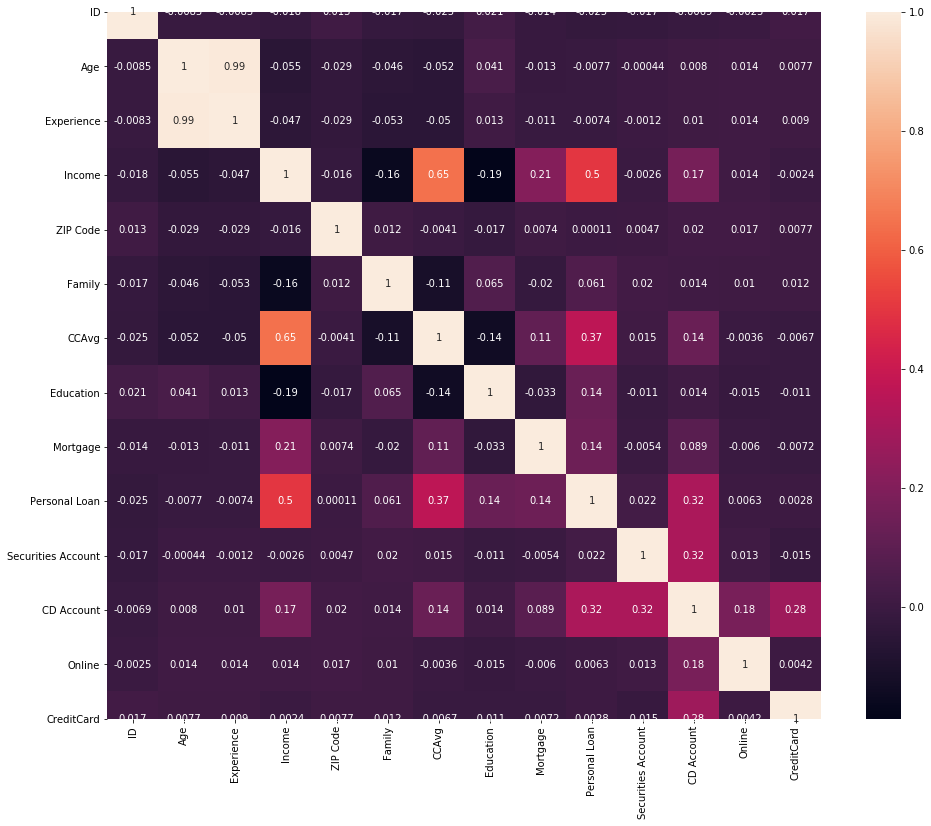

In [14]:
plt.figure(figsize = (16,13))
sns.heatmap(bank_data_df.corr(),annot=True)

<font color='green'> 
****
#### Inference
1. **Age,Experience** have a very high corelation.SO we can just use one of them for classification input.
2. We can see columns with negitive corelation but of relatively lesser magnitude.
3. CCAvg and income have a Considerable corelation.SO we can just use one of them for classification input.
****
</font>

****
#### 7. Take Absolute Value of Experience
****

In [15]:
bank_data_df['Experience']=bank_data_df['Experience'].apply(func = lambda x:abs(x))

In [16]:
bank_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<font color='green'> 
****
#### Inference
1. The minimum experience has changed to zero ,confirming that the absolute was applied correctly
****
</font>

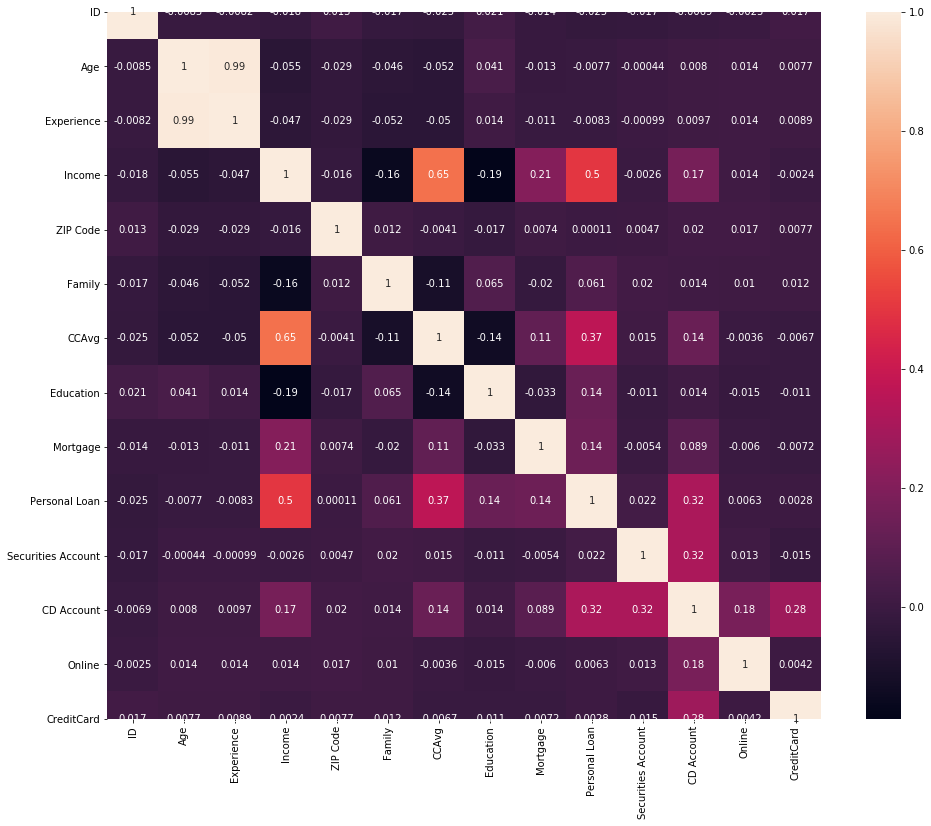

In [17]:
plt.figure(figsize = (16,13))
sns.heatmap(bank_data_df.corr(),annot=True)

<font color='green'> 
****
#### Inference
1. The corellation between experience and age still exists.
****
</font>

****
#### 8. Split the data into train and test
****

Lets create vectors for  Dependent variable (y) from Independent Variables (X)

In [18]:
y = bank_data_df['Personal Loan']
X = bank_data_df.loc[:,['Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account','Age',
       'CD Account', 'Online', 'CreditCard']]

In [19]:
test_size = 0.30
seed=1
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size,random_state=seed)

In [20]:
print("Shapes of test and train data")
print("X_train ="+str(X_train.shape))
print("X_test ="+str(X_test.shape))
print("y_train ="+str(y_train.shape))
print("y_test ="+str(y_test.shape))

Shapes of test and train data
X_train =(3500, 11)
X_test =(1500, 11)
y_train =(3500,)
y_test =(1500,)


In [21]:
#Analysising the test and train output split for Success classification
print(y_test.value_counts())
print(y_train.value_counts())

0    1351
1     149
Name: Personal Loan, dtype: int64
0    3169
1     331
Name: Personal Loan, dtype: int64


The ratio of split w.r.t to the dependent varaible look proportionate between the training and test data

****
#### 9. Build the Logestic Regression Model
****

In [22]:
#Model Generation
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_predict = log_model.predict(X_test)

In [23]:
#Checking the generated coefficients
column_names = list(X_train.columns)
coef_df = pd.DataFrame(log_model.coef_,columns=column_names)
coef_df['intercept'] = log_model.intercept_
print(coef_df)

   Experience    Income    Family     CCAvg  Education  Mortgage  \
0    0.387033  0.048667  0.636558  0.162616   1.621607  0.000782   

   Securities Account       Age  CD Account    Online  CreditCard  intercept  
0           -0.912188 -0.386679    3.256014 -0.585516   -1.003122  -2.746439  


****
#### 10. Confusion Matrix
****

In [24]:
metrics.confusion_matrix(y_test,y_predict)

array([[1334,   17],
       [  65,   84]], dtype=int64)

****
#### 11. Model Scores
****

In [25]:
print("Model Score for Train Data = "+str(log_model.score(X_train,y_train)))
print("Model Score for Test Data =  "+str(log_model.score(X_test,y_test)))

Model Score for Train Data = 0.9514285714285714
Model Score for Test Data =  0.9453333333333334


<font color='green'> 
****
#### Inference
1. The accurecy score for the test and train data are very close which is a good sign
2. But in this case it might be because of the excessive skew in the data as well.
****
</font>

****
#### 12. Classification Report
****

In [26]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.56      0.67       149

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



<font color='green'> 
****
#### Inference
1. The recall for "1" taking a loan in on the lesse side as the input data in itself has lot of skew
****
</font>